In [ ]:
# Load necessary packages
import os
import pandas as pd#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data for year 2018-2019. Take the month of March 2018

We will perform exploratory analysis with the full year data

In [4]:
df = pd.read_csv('D:\\nyc_bikeshare.csv', skiprows=range(1, 19000000)) 
df.iloc[2465000].to_csv('nyc_bikeshare_1y.csv', index=False)
df.iloc[3065000:3435000].to_csv('nyc_bikeshare_1m.csv', index=False)

In [3]:
df2 = pd.read_csv('D:\\nyc_bikeshare_1m.csv.zip')
df2.head(10)

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
0,650,03-06-19 08:33:35,03-06-19 08:44:26,3303.0,2000.0,35215,1.0,1989.0,1
1,586,03-06-19 08:33:36,03-06-19 08:43:22,3086.0,3112.0,33831,1.0,1979.0,1
2,258,03-06-19 08:33:38,03-06-19 08:37:56,441.0,522.0,32693,1.0,1997.0,2
3,920,03-06-19 08:33:43,03-06-19 08:49:04,3255.0,440.0,35288,1.0,1979.0,2
4,948,03-06-19 08:33:41,03-06-19 08:49:30,3159.0,516.0,32241,1.0,1987.0,1
5,2281,03-06-19 08:33:41,03-06-19 09:11:43,504.0,3233.0,26574,0.0,1963.0,2
6,463,03-06-19 08:33:50,03-06-19 08:41:33,3235.0,173.0,16215,1.0,1991.0,1
7,805,03-06-19 08:33:50,03-06-19 08:47:15,3356.0,525.0,30511,1.0,1982.0,1
8,326,03-06-19 08:33:45,03-06-19 08:39:12,275.0,3429.0,28690,1.0,1983.0,1
9,387,03-06-19 08:33:52,03-06-19 08:40:19,304.0,3461.0,36653,1.0,1995.0,2


In [11]:
df_1year = pd.read_csv('nyc_bikeshare_1m.csv')

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
0,784,07-20-18 06:49:26,07-20-18 07:02:30,3292.0,456.0,25697,1.0,1959.0,1
1,1275,07-20-18 07:53:13,07-20-18 08:14:29,3292.0,447.0,29898,1.0,1993.0,1
2,955,07-20-18 09:12:21,07-20-18 09:28:16,3292.0,3355.0,18755,0.0,1980.0,1
3,645,07-20-18 10:18:30,07-20-18 10:29:16,3292.0,3511.0,21434,1.0,1969.0,2
4,528,07-20-18 10:22:46,07-20-18 10:31:34,3292.0,3143.0,26039,0.0,1983.0,2
5,1407,07-20-18 10:29:29,07-20-18 10:52:57,3292.0,450.0,16993,1.0,1976.0,2
6,1185,07-20-18 10:59:16,07-20-18 11:19:01,3292.0,3323.0,19160,0.0,1990.0,2
7,2190,07-20-18 11:43:38,07-20-18 12:20:09,3292.0,457.0,29079,1.0,1983.0,2
8,624,07-20-18 13:00:57,07-20-18 13:11:21,3292.0,3295.0,31206,1.0,1962.0,2
9,1408,07-20-18 15:02:01,07-20-18 15:25:30,3292.0,3350.0,14734,1.0,1987.0,2


## Plot summary statistics, we see suspicious max for trip duration and min for birth year

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
df_1year.describe(include='all')

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
count,"370,000.00",370000,370000,"370,000.00","370,000.00","370,000.00","370,000.00","370,000.00","370,000.00"
unique,nan,322862,322980,nan,nan,nan,nan,nan,nan
top,nan,03-14-19 18:19:15,03-25-19 18:17:07,nan,nan,nan,nan,nan,nan
freq,nan,6,6,nan,nan,nan,nan,nan,nan
mean,891.69,NaN,NaN,"1,672.24","1,661.87","30,043.67",0.92,"1,979.44",1.17
std,"7,156.51",NaN,NaN,"1,471.37","1,470.37","6,675.20",0.28,12.19,0.50
min,61.00,NaN,NaN,72.00,72.00,"14,548.00",0.00,"1,885.00",0.00
25%,322.00,NaN,NaN,385.00,383.00,"26,506.00",1.00,"1,969.00",1.00
50%,544.00,NaN,NaN,517.00,515.00,"32,017.00",1.00,"1,982.00",1.00
75%,955.00,NaN,NaN,"3,295.00","3,293.00","35,599.00",1.00,"1,989.00",1.00


### Cleaning Trip duration with IQR

Use 1.5 for lower bound and 0.5 for upper bound due to heavy tailedness

In [7]:
Q1 = df_1year.tripduration.quantile(0.25)
Q3 = df_1year.tripduration.quantile(0.75)
IQR = Q3 - Q1

df1_robust = df_1year[~((df_1year.tripduration < (Q1 - 1.5 * IQR)) |(df_1year.tripduration > (Q3 + .5 * IQR)))]
df1_robust.describe(include='all')

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
count,"311,867.00",311867,311867,"311,867.00","311,867.00","311,867.00","311,867.00","311,867.00","311,867.00"
unique,nan,278274,278385,nan,nan,nan,nan,nan,nan
top,nan,03-14-19 18:19:15,03-25-19 18:17:07,nan,nan,nan,nan,nan,nan
freq,nan,6,6,nan,nan,nan,nan,nan,nan
mean,525.68,NaN,NaN,"1,649.03","1,636.87","29,982.39",0.95,"1,979.47",1.18
std,293.52,NaN,NaN,"1,469.76","1,468.05","6,665.17",0.22,12.17,0.47
min,61.00,NaN,NaN,72.00,72.00,"14,548.00",0.00,"1,885.00",0.00
25%,291.00,NaN,NaN,383.00,382.00,"26,463.00",1.00,"1,970.00",1.00
50%,465.00,NaN,NaN,513.00,509.00,"31,889.00",1.00,"1,982.00",1.00
75%,718.00,NaN,NaN,"3,292.00","3,290.00","35,541.00",1.00,"1,989.00",1.00


In [8]:
df1_robust['Age'] = 2020-df1_robust.birthyear
df1_robust.describe(include='all')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,Age
count,"311,867.00",311867,311867,"311,867.00","311,867.00","311,867.00","311,867.00","311,867.00","311,867.00","311,867.00"
unique,nan,278274,278385,nan,nan,nan,nan,nan,nan,nan
top,nan,03-14-19 18:19:15,03-25-19 18:17:07,nan,nan,nan,nan,nan,nan,nan
freq,nan,6,6,nan,nan,nan,nan,nan,nan,nan
mean,525.68,NaN,NaN,"1,649.03","1,636.87","29,982.39",0.95,"1,979.47",1.18,40.53
std,293.52,NaN,NaN,"1,469.76","1,468.05","6,665.17",0.22,12.17,0.47,12.17
min,61.00,NaN,NaN,72.00,72.00,"14,548.00",0.00,"1,885.00",0.00,17.00
25%,291.00,NaN,NaN,383.00,382.00,"26,463.00",1.00,"1,970.00",1.00,31.00
50%,465.00,NaN,NaN,513.00,509.00,"31,889.00",1.00,"1,982.00",1.00,38.00
75%,718.00,NaN,NaN,"3,292.00","3,290.00","35,541.00",1.00,"1,989.00",1.00,50.00


In [14]:
df_1year['Age'] = 2020-df_1year.birthyear
df1_robust = df1_robust[df1_robust.Age <= 90]
df1_robust.describe(include='all')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,Age
count,"311,650.00",311650,311650,"311,650.00","311,650.00","311,650.00","311,650.00","311,650.00","311,650.00","311,650.00"
unique,nan,278100,278207,nan,nan,nan,nan,nan,nan,nan
top,nan,03-15-19 08:34:39,03-25-19 18:17:07,nan,nan,nan,nan,nan,nan,nan
freq,nan,6,6,nan,nan,nan,nan,nan,nan,nan
mean,525.70,NaN,NaN,"1,649.05","1,636.83","29,982.68",0.95,"1,979.52",1.18,40.48
std,293.51,NaN,NaN,"1,469.78","1,468.07","6,665.04",0.22,11.98,0.47,11.98
min,61.00,NaN,NaN,72.00,72.00,"14,548.00",0.00,"1,930.00",0.00,17.00
25%,291.00,NaN,NaN,383.00,382.00,"26,463.00",1.00,"1,970.00",1.00,31.00
50%,465.00,NaN,NaN,513.00,509.00,"31,893.00",1.00,"1,982.00",1.00,38.00
75%,718.00,NaN,NaN,"3,292.00","3,290.00","35,541.00",1.00,"1,989.00",1.00,50.00


### Unique Bicycle numbers

In [67]:
df1_robust.bikeid.nunique()

4141

In [38]:
summary_stats = df1_robust.describe(include='all')
summary_stats[['tripduration','Age']].iloc[6:]

,tripduration,Age
min,61.00,17.00
25%,291.00,31.00
50%,465.00,38.00
75%,718.00,50.00
max,"1,271.00",90.00


# Histogram of Age and Trip duration post cleaning

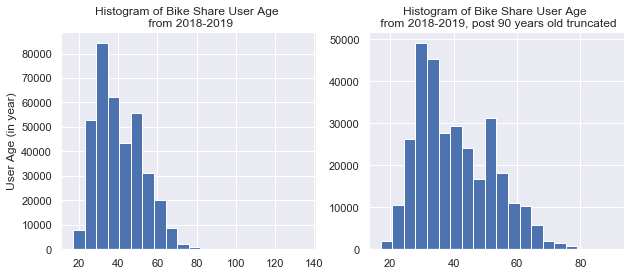

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].hist(df_1year['Age'], bins = 20)
axes[0].set_title('Histogram of Bike Share User Age \n from 2018-2019')
axes[0].set_xlabel('User Age (in year)')
axes[1].hist(df1_robust['Age'], bins = 20)
axes[1].set_title('Histogram of Bike Share User Age \n from 2018-2019, post 90 years old truncated')
fig.tight_layout()

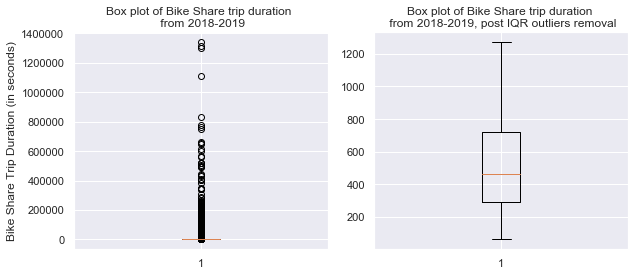

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].boxplot(df_1year['tripduration'])
axes[0].set_title('Box plot of Bike Share trip duration \n from 2018-2019')
axes[0].set_ylabel('Bike Share Trip Duration (in seconds)')
axes[1].boxplot(df1_robust['tripduration'])
axes[1].set_title('Box plot of Bike Share trip duration \n from 2018-2019, post IQR outliers removal')
fig.tight_layout()

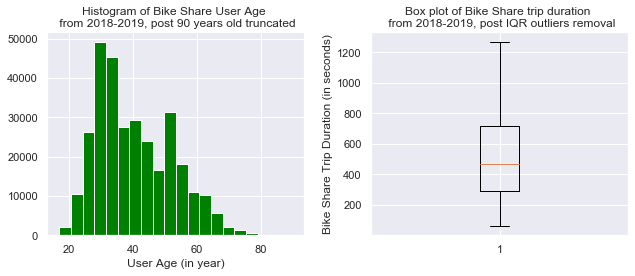

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].set_xlabel('User Age (in year)')
axes[0].hist(df1_robust['Age'], bins = 20, color= 'green')
axes[0].set_title('Histogram of Bike Share User Age \n from 2018-2019, post 90 years old truncated')
axes[1].set_ylabel('Bike Share Trip Duration (in seconds)')
axes[1].boxplot(df1_robust['tripduration'])
axes[1].set_title('Box plot of Bike Share trip duration \n from 2018-2019, post IQR outliers removal')

fig.tight_layout()
plt.savefig('preprocess.png', dpi = 600)

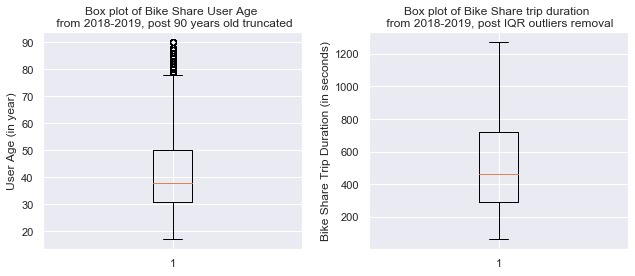

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].set_ylabel('User Age (in year)')
axes[0].boxplot(df1_robust['Age'])
axes[0].set_title('Box plot of Bike Share User Age \n from 2018-2019, post 90 years old truncated')
axes[1].set_ylabel('Bike Share Trip Duration (in seconds)')
axes[1].boxplot(df1_robust['tripduration'])
axes[1].set_title('Box plot of Bike Share trip duration \n from 2018-2019, post IQR outliers removal')
fig.tight_layout()
plt.savefig('preprocess_box.png', dpi = 1000)

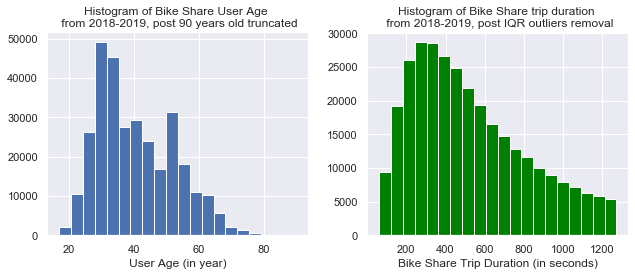

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].set_xlabel('User Age (in year)')
axes[0].hist(df1_robust['Age'], bins = 20)
axes[0].set_title('Histogram of Bike Share User Age \n from 2018-2019, post 90 years old truncated')
axes[1].set_xlabel('Bike Share Trip Duration (in seconds)')
axes[1].hist(df1_robust['tripduration'],bins = 20, color = 'green')
axes[1].set_title('Histogram of Bike Share trip duration \n from 2018-2019, post IQR outliers removal')

fig.tight_layout()
plt.savefig('preprocess_hist.png', dpi = 600)

In [84]:
df1_robust['Age'] = 2020-df1_robust.birthyear

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### When do they travel day night cycle: Check seasonality of Trip duration and Age

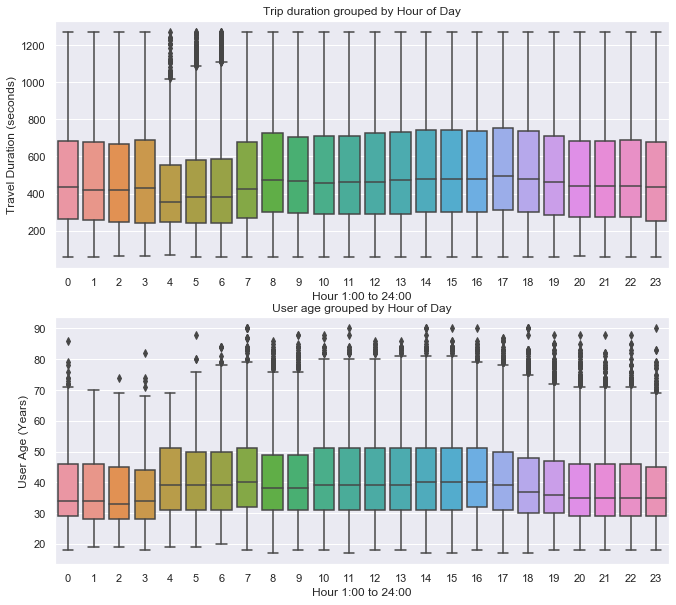

In [100]:
#df1_robust['Hour'] = pd.DatetimeIndex(df1_robust.starttime).hour
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 10))
#fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=df1_robust, x='Hour', y='tripduration', ax = axes[0])
axes[0].set_ylabel('Travel Duration (seconds)')
axes[0].set_xlabel('Hour 1:00 to 24:00')
axes[0].set_title('Trip duration grouped by Hour of Day')
sns.boxplot(data=df1_robust, x='Hour', y='Age', ax=axes[1])
axes[1].set_ylabel('User Age (Years)')
axes[1].set_xlabel('Hour 1:00 to 24:00')
axes[1].set_title('User age grouped by Hour of Day')
plt.savefig('seasonality.png', dpi = 600)

###  Draw pie chart of Gender and Customer Type

In [54]:
df.gender.value_counts()

1    5602630
2    1972217
0     640490
Name: gender, dtype: int64

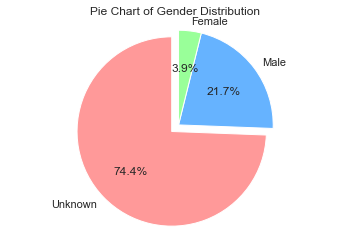

In [65]:

#m = {'Female' : 2,'Male' : 1, 'Unknown' : 0}
#df1_robust['gender_Cat'] = df1_robust['gender'].str[0].map(m)
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.set_title('Pie Chart of Gender Distribution')
ax1.pie(df1_robust.gender.value_counts(), explode=(0.1, 0, 0), labels=['Unknown','Male','Female'], autopct='%1.1f%%',
        shadow=False, startangle=90, colors = colors)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

fig1.savefig('genderdist.png', bbox_inches="tight", dpi = 1000)
#plt.savefig('genderdist.png', dpi = 1000)

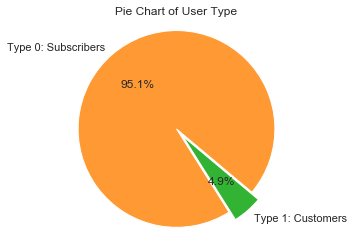

In [79]:
colors = ['#ff9933','#33b333']
fig1, ax1 = plt.subplots()
ax1.set_title('Pie Chart of User Type')
ax1.pie(df1_robust.usertype.value_counts(), explode=(0,0.1), labels=['Type 0: Subscribers','Type 1: Customers'], autopct='%1.1f%%',
        shadow=False, startangle=320, colors = colors)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

fig1.savefig('genderdist.png', bbox_inches="tight", dpi = 1000)

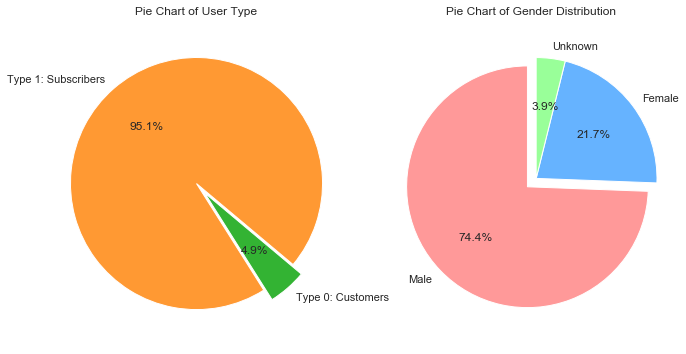

In [101]:
fig1, ax1  = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))

colors = ['#ff9933','#33b333']
ax1[0].set_title('Pie Chart of User Type')
ax1[0].pie(df1_robust.usertype.value_counts(), explode=(0,0.1), labels=['Type 1: Subscribers','Type 0: Customers'], autopct='%1.1f%%',
        shadow=False, startangle=320, colors = colors)

ax1[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

colors = ['#ff9999','#66b3ff','#99ff99']
ax1[1].set_title('Pie Chart of Gender Distribution')
ax1[1].pie(df1_robust.gender.value_counts(), explode=(0.1, 0, 0), labels=['Male','Female','Unknown'], autopct='%1.1f%%',
        shadow=False, startangle=90, colors = colors)

ax1[1].axis('equal')

fig1.savefig('customergenderrdist.png', bbox_inches="tight", dpi = 600)

In [93]:
df1_robust.gender.value_counts()

1    231876
2     67713
0     12061
Name: gender, dtype: int64

In [95]:
df1_robust.usertype.value_counts()

1.00    296286
0.00     15364
Name: usertype, dtype: int64